### basic utilities

In [ ]:
from gymnasium import Env
from gymnasium.spaces import Discrete, Box
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 🧠 Random number helper (seedless by default)
def random_uniform(low, high):
    """
    Generate a random float uniformly between `low` and `high`.

    reproducibility:
    ---------------------------------
    - By default, this function uses NumPy's global random generator.
      That means each time you run the notebook, you'll get new random values.
    
    - If you ever want **reproducible results**, do this instead:
        rng = np.random.default_rng(42)       # 42 = your chosen seed
        return rng.uniform(low, high)
    """
    return np.random.uniform(low, high)

# 🎯 Random integer helper (seedless by default)
def random_uniform_int(low, high):
    """
    Generate a random integer between `low` (inclusive) and `high` (exclusive).

    reproducibility:
    ---------------------------------
    - By default, this function uses NumPy's global random generator.
      That means each time you run the notebook, you'll get new random integers.
    
    - For **reproducible results**, do this instead:
        rng = np.random.default_rng(42)       # 42 = your chosen seed
        return rng.integers(low, high)
    """
    return np.random.randint(low, high)


# Configurations

In [2]:
RISK_LEVELS = ["LOW", "BALANCED", "HIGH"]
INFLATION_RATES = [random_uniform(0.02, 0.04), random_uniform(0.04, 0.06), random_uniform(0.06, 0.08)]
ROI_RANGES=[(0.05, 0.10), (0.10, 0.20), (0.25, 0.50)]


CONFIGURATIONS= {
    "TOTAL_BUDGET": 1,
    "TOTAL_TIMESTEPS": 12,
}

LOW_RISK_SCENARIO_CONFIGS ={
    "RISK_LEVEL": RISK_LEVELS[0],
    "INFLATION_RATE": INFLATION_RATES[0],
    "ROI_RANGE": ROI_RANGES[0],
}

BALANCED_RISK_SCENARIO_CONFIGS ={
    "RISK_LEVEL": RISK_LEVELS[1],
    "INFLATION_RATE": INFLATION_RATES[1],
    "ROI_RANGE": ROI_RANGES[1],
}

HIGH_RISK_SCENARIO_CONFIGS ={
    "RISK_LEVEL": RISK_LEVELS[2],
    "INFLATION_RATE": INFLATION_RATES[2],
    "ROI_RANGE": ROI_RANGES[2],
}



## 🚀 Activating scenarios

*later to be set as a test design architecture*

In [3]:
# 🔧 Choose the active configuration
ACTIVE_SCENARIO = LOW_RISK_SCENARIO_CONFIGS

### Importing the torch and checking Cuda availability

In [4]:
# import torch
# print(torch.__version__)
# print("CUDA available:", torch.cuda.is_available())
# print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")

# Introduction
This continues the paragraph normally.here we're going to elaborate on the problem definition and design choices.

## Overview on Project Portfolio Management
This continues the paragraph normally.here we're going to elaborate on the problem definition and design choices.

### Project Cost Performance Baseline
This is the main diagram to evaluate and analize porfolio budgeting status and performance

<img style="
padding-top: 2em;
padding-left: 2em; 
margin: auto;
display: block;
" src="../assets/public/Project-cost-baseline-graph.jpg" alt="drawing" width="400"/>

## Deffinition of the Problem and scope
This is an endevour to build and train a DRL agent that will learn to allocate budget for a portfolio of projects under cashflow uncertainties.

<div style="color: cyan;">**This is not an other Project portfolio simulation, This is a DRL Artificial Agent framework ready to adapt for project portfolio budgetting with configurable specifications to implement on any realworld portfolio**</div>

the focus and main objective is to train an agent with robust and stable policy for basic deterministic (0 uncertainty ) to the most uncertain environment for both cost performance and expected payment delays and shortage amounts.

just like a project with the goal to train an agent to walk, mere walking in a simple direction is not sufficient. we would expect the agent to have the capabilities to walk across uneven surfaces in multiple desired directions and pivot around the obstacles. after that we would strees test the policies and the agent's ability by pushing him or throwing objects at him to test it's ability to maintain the action of walking toward the target destination.

<img style="
padding-top: 2em;
padding-left: 2em; 
margin: auto;
display: block;
" src="../assets/public/walking_agent_recording_gif_5MB.gif" alt="drawing" width="600"/>

what we do here follows the same process.
we would train an agent on a base deterministic scenario so he would learn the basic budget allocation decisions and then start to make the envronment as uncertain as possible and meaningful and of course feasable for progressive allocation and positive ROI.

As the main idea is to introduce a generic solution for the problem and deliver a DRL framework for budgeting, the scenarios and composition of parameters would have a wide range of sensitivity test to encapsulate almost all realworld portfolios.


### limitations and future work
* integrated risk management models to simulate portfolio level risk corelations.</br>
        We do not exhaustively model all types of inter-project dependences (e.g., copulas or client-cluster Markov chains). Those are left for future work. Our choice balances experimental clarity and realism: the latent-factor + shock tests capture first-order correlated behaviors relevant to portfolio budgeting while keeping the study focused.

# environment design overview
The desing for the environment consists of several key components.
here's an infograph of environment and it's architecture:

<img style="
padding-top: 2em;
padding-left: 2em; 
margin: auto;
display: block;
" src="../assets/Info_graphs/environment/Mindmap - 2025.10.30-Environment.svg" alt="drawing" width="400"/>


## Project class Methods and main functionalities
the blueprint for generating projects to become portfolios 

## The ROI (Return On Investment) model
The model for ROI
* a good academic middle ground is 10–15% ROI on BAC at completion

    | Scenario                         | Typical ROI Margin | Interpretation                |
    | -------------------------------- | ------------------ | ----------------------------- |
    | Government or regulated industry | 5–10%              | Low-risk, cost-plus contracts |
    | Private corporate portfolios     | 10–20%             | Balanced risk-reward          |
    | High-tech / startup ventures     | 25–50%             | High risk, high volatility    |


In [5]:
def set_roi(self):
    """
    Set the ROI (Return on Investment) for a project based on the active scenario.
    
    ROI is randomly selected as a discrete multiple of 5% within the configured range.
    Uses the globally defined ACTIVE_SCENARIO dictionary.
    """
    low, high = ACTIVE_SCENARIO["ROI_RANGE"]
    step = 0.05

    # Generate discrete ROI choices, rounded to 2 decimals to avoid float artifacts
    roi_choices = np.round(np.arange(low, high + step/2, step), 2)

    # Randomly pick one
    roi_selected = float(np.random.choice(roi_choices))

    # Assign clean float to instance
    self.ROI = round(roi_selected, 2)
    return self.ROI


## The shedule

1. set the BAC
    <div style="color: pink;">for now it's randomly setted around 1</div>
2. set the Duration
    <div style="color: pink;">for now it's randomly selected around the total timesteps</div>
3. s-curve (cost baseline) or BCWS schedule
    * <div style="color: pink;">for now it's randomly selected from introduced models</div>
    


* **adjusted planned costs to the inflation calculated and stored in BCWS_adj to later be used in performance analysis**
    <div style="color: pink;">the inflation rate is set in risk scenarios </div>

### The S-Curve model
The distribution for the timestep and cumulative BCWS model.

Each project’s Planned Value (BCWS) represents the cumulative planned cost over time — typically follows an S-shaped curve. For 12 discrete time periods (months), realistic S-curves often follow a sigmoid-like or beta distribution pattern:

1. Front-loaded (aggressive start) — common in infrastructure or fast-track projects.
2. Balanced (classic S-curve) — most corporate projects.
3. Back-loaded (late burn) — R&D or innovation-heavy projects where initial effort is planning-heavy, not cost-heavy.

    | Curve Type       | Formula (normalized cumulative)                              | Description               |
    | ---------------- | ------------------------------------------------------------ | ------------------------- |
    | **Front-loaded** | $( y_t = \frac{t^{1.5}}{12^{1.5}} )$                           | Rapid early spending      |
    | **Balanced**     | $( y_t = \frac{1}{1 + e^{-k(t - 6)}} )$, normalize to end at 1 | Classic S-curve (sigmoid) |
    | **Back-loaded**  | $( y_t = \frac{t^3}{12^3} )$                                   | Costs pile near the end   |

You’ll scale each curve so that:

$BCWS_{t} = BAC * y_{t}$


But since inflation compounds over time, a more realistic model is to adjust the costs using linear inflation ramp:

$BCWS_{t} ^ {adj} = BCWS_{t}*(1.04 * t/12)$

This adds ~2% extra by midyear, ~4% by year-end.


*Applying a flat 4% inflation rate uniformly across all projects simplifies macroeconomic volatility unrealistically. Sectoral inflation varies (e.g., construction inflation may exceed 6–8%, while IT or service projects may be below 3%).*
*Sensitivity analysis for inflation rates (2–6%) will be included to evaluate the agent’s robustness to macroeconomic variation.*

In [6]:
# random around 12
def set_duration(self):
    """
    Assign a random project duration around 12 timesteps (discrete).
    Uses ±2 variation for diversity across projects.
    """
    mean_duration = CONFIGURATIONS["TOTAL_TIMESTEPS"]
    self.DURATION = random_uniform_int(mean_duration - 2, mean_duration + 3)
    return self.DURATION

# random around 1
def set_bac(self):
    """
    Assign a random Budget At Completion (BAC) value around 1.
    This will later be normalized to the episode's total budget.
    """
    self.BAC = random_uniform(0.8, 1.2)
    return self.BAC


# it will return the curve starting from 0 to the BAC
# No roi adjustment
# No inflation adjustment
def set_s_curve(self):
    """
    Build the project schedule using one of three S-curve models:
    front-loaded, balanced, or back-loaded.

    Returns:
        schedule (list of tuples): [(timestep, cumulative_adjusted_BCWS), ...]
    """

    # --- Extract base parameters ---
    duration = self.DURATION
    BAC = self.BAC
    
    t = np.arange(0, duration + 1)

    # === Define local S-curve models ===
    def front_loaded():
        """Front-loaded S-curve: rapid early spending."""
        return (t ** 1.5) / (duration ** 1.5)

    def balanced(k=1):
        """Balanced S-curve: logistic sigmoid pattern."""
        y = 1 / (1 + np.exp(-k * (t - duration / 2)))
        return y / y[-1]  # normalize to end at 1

    def back_loaded():
        """Back-loaded S-curve: costs rise near the end."""
        return (t ** 3) / (duration ** 3)

    # === Dictionary of models ===
    models = {
        "front loaded": front_loaded,
        "balanced": balanced,
        "back loaded": back_loaded
    }

    # === Randomly pick a model ===
    random_curve_type = np.random.choice(list(models.keys()))
    model_func = models[random_curve_type]

    # === Generate normalized curve ===
    y = model_func()
    y /= y[-1]  # normalize to end at 1 (safety)

    # === Compute baseline BCWS and inflation adjustment ===
    BCWS = BAC * y 
    
    # === Package as list of tuples ===
    cost_schedule = [(int(t), float(b)) for t, b in zip(t, BCWS)]

    # === Store attributes ===
    self.CURVE_TYPE = random_curve_type
    self.BCWS = BCWS
    
    self.SCHEDULE = cost_schedule
    self.TIMESTEPS = t


    # this is the iflation rate adjusted BCWS, but we will return the simple BCWS schedule. 
    # it should be later used in performance analysis metrics for the agent's learning 
    inflation_rate = ACTIVE_SCENARIO["INFLATION_RATE"]
    inflation_factors = 1 + inflation_rate * (t / duration)
    self.BCWS_INFLATION_ADJUSTED = BCWS * inflation_factors
    

    # output: First and Last 2 points: [(1, 0.0006094183828118756), (2, 0.004889583013878898)] [(11, 0.8348209316375593), (12, 1.0868995859870523)]
    return cost_schedule



## The Inflow model
this section calculates the expected payment schedule
* expected payment shedule
    * <div style="color: pink;">it's values are calculated according to the BCWS schedule </div>
    * <div style="color: pink;">it is adjusted to the ROI rate of the active scenario</div>

To realistically simulate project-level cash inflows within the PPO-based portfolio budgeting environment, three fundamental inflow models are selected. 
1. Milestone-Based (including advance and delivary)
    * milestone positionings are randomly selected and at that timestep the roi adjusted BCWS value is considered as expected payment
2. EV-Based (Progressive)
3. Lump-sum (advance or delivary payment)

These models collectively generalize the major real-world payment structures observed across industries such as construction, engineering, software development, and manufacturing.

Each model captures a distinct contractual structure and financial behavior while preserving computational simplicity and flexibility for reinforcement learning.


*In milestone-based contracts, there’s almost always an advance payment (15–30%) and a final retention/delivery payment (≥15%), with the rest distributed among intermediate milestones*

In [7]:
def set_expected_payment_schedule(self):
    """
    Generate expected cumulative inflow (payment) schedule for the project.
    Randomly selects one of three inflow models:
      - milestone-based
      - ev-based (progressive)
      - lump-sum

    All models derive payment timing and magnitude from the BCWS curve.
    
    Returns:
        list: cumulative expected inflows per timestep (length = project duration)
    """

    duration = self.DURATION
    BAC = self.BAC
    t = np.arange(0, duration + 1)
    BCWS = np.array(self.BCWS)
    
    # normalize BCWS (0→1) for proportional computation of payment plan
    self.BCWS_NORMAL = BCWS / BCWS[-1]  

    # === 1️⃣ Milestone-Based Model ===
    def milestone_based(self):
        """
        Milestone-based payments WITHOUT Dirichlet:
        - One advance payment at t=1 (15%–30%) in 5% steps.
        - One final payment at t=duration (15%–25%) in 5% steps.
        - Intermediate payments set directly to BCWS_ROI_ADJUSTED at random timesteps.
        Returns:
            list: cumulative expected inflows (length = duration)
        """

        duration = self.DURATION
        BAC = self.BAC
        BCWS = np.array(self.BCWS, dtype=float)

        total_expected_payment = BAC * (1.0 + self.ROI)

        # --- ROI-adjusted BCWS scaling ---
        scale_factor = total_expected_payment / BCWS[-1]
        self.BCWS_ROI_ADJUSTED = BCWS * scale_factor  # normalized so last = total_expected_payment

        # --- Advance and final fractions ---
        advance_frac = np.random.choice(np.arange(0.15, 0.31, 0.05))  # 15%–30%
        final_frac   = np.random.choice(np.arange(0.15, 0.26, 0.05))  # 15%–25%

        # --- Intermediate milestone count and positions ---
        possible_positions = np.arange(1, duration)
        n_middle = random_uniform_int(1, min(4, len(possible_positions)))
        # --- Random milestone placement ensuring non-negative cashflow ---
        max_attempts = 50
        for _ in range(max_attempts):
            middle_positions = sorted(np.random.choice(possible_positions, n_middle, replace=False))
            
            # build the temporary payment schedule
            prev_pos = 0
            cumulative = advance_frac * total_expected_payment
            temp_schedule = np.full(duration + 1, cumulative)
            
            for pos in middle_positions:
                incremental_payment = self.BCWS_ROI_ADJUSTED[pos] - self.BCWS_ROI_ADJUSTED[prev_pos]
                cumulative += incremental_payment
                temp_schedule[pos:] = cumulative
                prev_pos = pos
            
            # Check: all payments >= BCWS baseline (non-negative cashflow)
            if np.all(temp_schedule >= self.BCWS):
                break
        else:
            print("⚠️ Warning: could not find milestone combination maintaining positive cashflow")


        # --- Build cumulative expected payment schedule ---
        schedule = np.zeros(duration + 1 , dtype=float)

        # 1️⃣ Advance payment (t=0)
        cumulative = advance_frac * total_expected_payment
        schedule[:] = cumulative  # everything starts at advance level

        # 2️⃣ Intermediate payments at BCWS_ROI_ADJUSTED points
        prev_pos = 0
        for pos in middle_positions:
            incremental_payment = self.BCWS_ROI_ADJUSTED[pos] - self.BCWS_ROI_ADJUSTED[prev_pos]
            cumulative += incremental_payment
            schedule[pos:] = cumulative
            prev_pos = pos

        # 3️⃣ Final payment (t = duration)
        min_final = final_frac * total_expected_payment
        final_cumulative = max(self.BCWS_ROI_ADJUSTED[-1], min_final, cumulative)
        schedule[-1] = final_cumulative

        return schedule.tolist()



    # === 2️⃣ EV-Based Model ===
    def ev_based():
        """
        Payments progress smoothly with BCWS at each timestep.
        """
        inflows = BAC * self.BCWS_NORMAL
        return inflows.tolist()

    # === 3️⃣ Lump-Sum Model ===
    def lump_sum():
        """
        Single payment — either advance (at t=0) or final (at t=end),
        proportional to BAC and BCWS shape.
        """
        payments = np.zeros(duration)
        if np.random.rand() < 0.5:
            # Advance lump sum (based on BCWS fraction early)
            payments[:] = BAC * 1.0  # fully paid at start
        else:
            # Final lump sum (based on BCWS end)
            payments[-1:] = BAC
        return payments.tolist()

    

    # === Model selector ===
    models = {
        "milestone": milestone_based,
        "ev_based": ev_based,
        "lump_sum": lump_sum
    }

    inflow_type = np.random.choice(list(models.keys()))
    inflows = models[inflow_type]()

    self.INFLOW_TYPE = inflow_type
    self.INFLOW_SCHEDULE = inflows

    return inflows

    


## Ploting the shedules

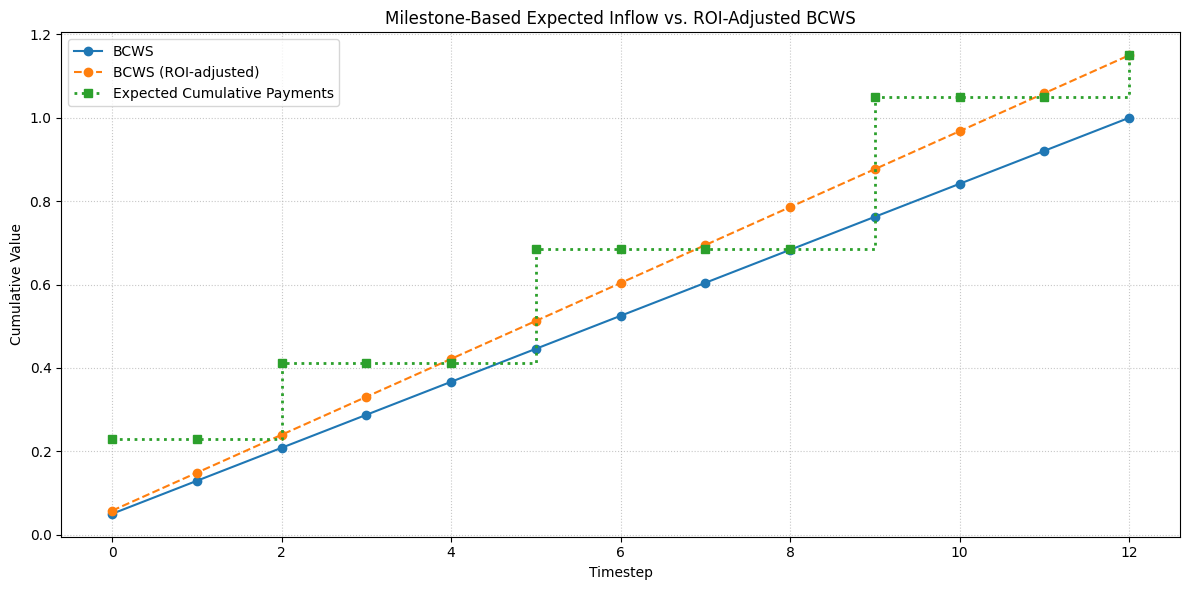

In [41]:
# --- Plotting the cumulative expected inflow vs BCWS baseline ---
t = np.arange(0, p.DURATION + 1)

plt.figure(figsize=(12, 6))
plt.plot(t, p.BCWS, label="BCWS", linestyle="solid", marker="o")
plt.plot(t, p.BCWS_ROI_ADJUSTED, label="BCWS (ROI-adjusted)", linestyle="--", marker="o")

plt.step(t, result, where="post", label="Expected Cumulative Payments", linewidth=2, linestyle="dotted",marker="s")
# plt.plot(t, result, label="Expected Cumulative Payments", linewidth=2, marker="s")

plt.title("Milestone-Based Expected Inflow vs. ROI-Adjusted BCWS", fontsize=12)
plt.xlabel("Timestep")
plt.ylabel("Cumulative Value")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.tight_layout()
plt.show()

## The Project Class

In [9]:
class ProjectClass():
    def __init__(self):
        pass

# Portfolio Generator
each portfolio is instantiated by projects


In [10]:
# ! we will need to normalize the total BACs of the projects to TOTAL_BUDGET which is 1

class PortfolioClass:
    def __init__(self):
        pass

## Portfolio inflow composition
* Proposed inflow composition for portfolio
    | **Model**                           | **Recommended Share in Portfolio Simulation** | **Justification**                                                                                                                                                                                                          |
    | ----------------------------------- | --------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
    | **Milestone-Based** | **50%**                                       | Dominant in contract work; model explicitly allows an **advance** as the first milestone (advance fraction α_adv) and retention/delays for later milestones — captures both advance-funded and milestone-funded contracts. |
    | **EV-Based**                        | **30%**                                       | Represents performance-linked payments. Dense signal helpful for learning ROI-driven allocation policies.                                                                                                                  |
    | **Lump-Sum**                        | **20%**                                       | Simple control cases and edge scenarios (advance-only or completion-only payments).                                                                                                                                        |


*“The inflow composition (50% milestone-based, 30% EV-based, 20% lump-sum) represents a balanced abstraction derived from empirical project management literature and contracting trends across industries. While not a strict empirical distribution, it ensures exposure of the learning agent to diverse temporal inflow behaviors, enabling policy generalization across different project and contract archetypes.* 

*Sensitivity analyses confirm the stability of the agent’s performance under alternative inflow compositions and inflation rates.”*


In [11]:
class PortfolioClass(PortfolioClass):
    def set_inflow_composition(self):
        pass

## The payment delay uncerainty
Payment delay uncertainty represents one of the most influential stochastic variables in project portfolio cash flow dynamics. Delays alter expected liquidity flows, distort working capital cycles, and influence the financial resilience of the entire portfolio.

Empirical research across construction, infrastructure, and multi-stakeholder IT projects confirms that payment behavior rarely follows deterministic schedules; instead, it follows distinct statistical and behavioral patterns — sometimes discrete, sometimes continuous, and often correlated with prior events.

To realistically capture such variability, we introduce five complementary stochastic modeling strategies for delay simulation:
* Geometric model – discrete, memoryless delay process (probabilistic per-period payment);
* Gaussian model – symmetric, continuous deviations (administrative uncertainty);
* Log-normal / Exponential model – long-tailed positive skew (severe payment lags);
* Markovian model – state-dependent persistence of delays (systemic behavior);
* Mixture model – hybrid ensemble of multiple distributions for diversified portfolios.
    | **Model**                          | **Mathematical Formulation**                                                 | **Empirical Basis / Justification**                                           | **Key Characteristics**                                                                        | **Use Case Examples**                                                            | 
    | ---------------------------------- | ---------------------------------------------------------------------------- | ----------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
    | **Geometric Delay**                | $( P(D = k) = (1 - p)^{k-1} p )$                                               | Models recurring invoicing cycles with independent payment probability ( p ). | Discrete-time, memoryless, easily calibrated using frequency of “on-time vs delayed” payments. | Periodic contracts with monthly billing or milestone triggers.                   |        
    | **Gaussian (Normal) Delay**        | $( D \sim \mathcal{N}(\mu, \sigma^2)$ ), truncated $( D \ge 0 )$                 | Captures small symmetric administrative deviations around the expected date.  | Continuous, symmetric, fast convergence.                                                       | Government or institutional projects with stable payment systems.                |                                                    
    | **Log-Normal / Exponential Delay** | $( D \sim \text{LogNormal}(\mu, \sigma^2)$ ) or $( D \sim \text{Exp}(\lambda)$ ) | Models skewed, long-tail risk of significant payment delays.                  | Non-negative, skewed, accounts for extreme late payments.                                      | Construction, oil & gas, or infrastructure projects with complex payment chains. |                                                  
    | **Markovian Delay**                | $P_{ij}​=P(D_{t}​=s_{j} ​∣ D_{t−1} ​= s_{i}​) $                                                     | Captures correlated or state-dependent delay sequences (e.g., repeated client delays).         | Dynamic, stateful, captures systemic or contextual persistence.                  | Portfolios with recurring clients or interdependent contracts. |
    | **Mixture Model**                  | $ f(D)=\sum_{i=1}^K ​w_{i}​f_{i}​( D ∣ θ_{i}​) $                                                  | Aggregates heterogeneous project or client populations; fits multimodal delay patterns.        | Flexible, captures diversity across project types.                               | Cross-industry or multi-client project portfolios.             |


Each approach offers a tradeoff between analytical simplicity, empirical fidelity, and simulation tractability, making the combination a theoretically justified and empirically sufficient composition for generalizing delay uncertainty in project inflow modeling.


* Training and experiment scenarios for payment delayed modeling:

    | **Scenario**                    | **Purpose**                                                    | **Delay Model**         | **Expected Outcome / Observation**                                            |       
    | ------------------------------- | -------------------------------------------------------------- | ----------------------- | ----------------------------------------------------------------------------- |
    | **No Delay (Control)**          | Establish baseline performance with ideal cash flow.           | None                    | Benchmark: agent learns expected return patterns without uncertainty.         |         
    | **Small Random Delays**         | Simulate normal operational hiccups.                           | **Normal Distribution** | Tests robustness to mild timing noise; measures variance in returns.          |  
    | **Big Skewed Delays**           | Model long-tail risks and delayed client payments.             | **Log-Normal**          | Evaluates resilience under rare but severe delays; expected liquidity stress. | 
    | **Persistent Late Client**      | Represent behaviorally “sticky” clients with memory of delays. | **Markov Process**      | Tests policy adaptability under state-dependent delay persistence. |
    | **Hybrid Randomness (Mixture)** | Capture mixed populations of clients in real portfolios.       | **Mixture Model**       | Evaluates generalization: can agent handle varied and correlated patterns?    |     

In [12]:
class PortfolioClass(PortfolioClass):
    def set_delayed_payment(self):
        pass

## The payment amount uncertainty
“Payment amount uncertainty is modeled using a three-component generative process: small-magnitude multiplicative measurement noise (Gaussian/lognormal) to capture routine invoice/rounding variation; stochastic holdbacks modeled via Beta-distributed withholding fractions to capture client-side disputes and ad-hoc retention; and rare heavy-tail reductions (with low probability) to represent disputes, defaults or clawbacks. The composite model mirrors empirically observed payment behavior in contracting literature and provides both dense and rare-event variability required to test policy robustness.”

The three payment-amount uncertainty strategies:
1. Multiplicative measurement noise (continuous, small perturbations)
2. Withholding / partial payment (retention & dispute) (discrete fraction withheld)
3. Stochastic partial/default events (rare, heavy-tailed reductions)
    | Strategy                                              |                                                                                                                                 Intuition / Real-world Mechanism | When it applies                                      | Effect on agent learning / decisions                                                                                      |
    | ----------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
    | **Multiplicative measurement noise**                  |                                   Small, frequent deviations in paid amounts due to rounding, accounting, petty deductions, or exchange-rate micro-fluctuations. | Every payment event (milestone, EV-pay, lump).       | Adds dense, low-amplitude stochasticity → encourages robustness to forecast noise; little structural change in liquidity. |
    | **Withholding / partial holdback**                    | Client withholds a (small) fraction pending QA, dispute resolution, or ad-hoc rejection of a claim. Differs from planned retention because it is semi-unplanned. | Milestone and EV-based payments; sometimes advances. | Systematic downscaling of expected inflows → forces the agent to maintain buffers and plan conservatively.                |
    | **Rare heavy reductions (shock / dispute / default)** |                                                      Infrequent but large payment reductions or reversals due to disputes, defaults, or contract renegotiations. | Any payment event; usually rare and high-impact.     | Tail-risk events that require robustness; policies must avoid catastrophic liquidity exposures or rely on borrowing.      |


Combining the strategies:
* You can mix them multiplicatively and sequentially
1. Generate scheduled raw payment 𝑃 (Dirichlet fractions, EV mapping, or lump value).
2. Apply multiplicative measurement noise: 𝑃 ← 𝑃 ⋅ ( 1 + 𝜀 ).
3. Apply scheduled retention (if any) and randomly sampled unplanned holdback: P←(1−r−h)P.
4. With rare probability $P_{s}$ apply shock reduction:  P←(1−d)P.
5. Clip to $[0,P_{max}]$ and shift by delay.



How to integrate into training & experiments:
1. Train with moderate noise + occasional holdbacks (σ=0.02, p_s=0.01).
2. Robustness tests: stress with higher σ, higher p_s, or correlated shocks across projects.
3. Ablation: train without shocks vs train with shocks; show agent robustness gap.
4. Observability variants: expose expected holdback probability or keep it latent (partial observability) and measure agent adaptability.

    | Experiment ID | σ (noise) | p_s (shock) | r (retention) | Description                         |
    | ------------: | --------: | ----------: | ------------: | ----------------------------------- |
    |          Base |      0.02 |        0.01 |          0.05 | Default training regime             |
    |      No-noise |      0.00 |        0.01 |          0.05 | Ablation: remove measurement noise  |
    |    High-shock |      0.02 |        0.05 |          0.05 | Stress test with frequent shocks    |
    |   No-holdback |      0.02 |        0.01 |          0.00 | Test effect of unplanned holdbacks  |
    |  Stressed-mix |      0.04 |        0.03 |          0.10 | Harsh regime for resilience testing |

In [13]:
class PortfolioClass(PortfolioClass):
    def set_payment_amount(self):
        pass

## Delay–amount correlation within a single project

In [14]:
class PortfolioClass(PortfolioClass):
    def set_delay_amount_corelation(self):
        pass

## Shared uncertainties and project correlations

Milestone-based payment models in this study explicitly include the common hybrid ‘advance + milestone + retention’ structure. We model the advance as the first milestone (t=0) with advance fraction α_adv (default 15%). Subsequent milestone fractions are sampled from a Dirichlet distribution and scaled to satisfy Σ payments + retention = BAC. Payments are subject to geometric delays and multiplicative noise. This parametric approach allows the environment to represent advance-funded, milestone-funded, and hybrid contracts with a single, transparent generator; sensitivity analyses over α_adv and retention r are presented to demonstrate robustness.


Primary experiments assume independent payment timing and amount uncertainty across projects to focus on budget allocation behavior. To test robustness, we include a single correlated stress scenario: with probability $p_{global}$ (0.01 per episode) a global shock simultaneously increases expected payment delays and reduces received payment amounts for all projects for $s$ timesteps. 

We intentionally prioritize clarity and the core budgeting problem. Full correlation modeling is orthogonal to the main contribution and would significantly enlarge the scope. We validate the agent’s robustness using a minimal, interpretable correlated scenario (global shock or single latent factor) and leave a systematic study of copula-based and multi-factor dependencies for future work.

This models systemic liquidity disruptions (e.g., macro slowdown) and demonstrates policy resilience under correlated risk. Sensitivity to shock probability and severity is reported in Section X111

To probe the agent’s robustness to correlated cashflow risk we implement a simple latent-factor model and a synchronous shock layer. The latent-factor Z_t perturbs per-project payment parameters (amount/delay) with small loadings; this introduces controllable pairwise correlation without over-parameterizing the environment. Additionally, infrequent global shocks (probability $𝑝_{global​}$) synchronously increase delays and reduce payment amounts to simulate systemic stress. We vary factor strength and shock probability in sensitivity tests.

Latent-Factor Correlation:

* Introduce a shared underlying factor 𝐹 that affects all projects proportionally.
* Simulates common macroeconomic or market trends.
* Formula for project variable $𝑋_{𝑖}​$:
    * $ X_{i}\ =\ \mu_{i}\ +\ \beta_{i}\ F\ +\ \epsilon_{i} $
    * $\mu_{i}$: mean value
    * $\beta_{i}$: sensitivity to latent factor
    * $\epsilon_{i}$: independent project noise
* Purpose: agent learns to adapt to portfolio-level systemic trends, not just isolated randomness.

Global Shock:
* Rare, extreme event affecting all projects simultaneously.
* Formula addition:
    * $ X_{i}\ =\ \mu_{i}\ +\ \beta_{i}\ F\ +\ \gamma_{i}S\ +\ \epsilon_{i} $
    * 𝑆: global shock variable (probabilistic occurrence)
    * $\gamma_{i}S$: sensitivity of each project to the shock
* Examples: financial crisis, widespread client defaults, regulatory change.
* Purpose: stress-test agent and evaluate robustness under extreme scenarios.

In [15]:
class PortfolioClass(PortfolioClass):
    def set_shared_uncertainty(self):
        pass